In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.linalg as linalg
import sys
import seaborn as sns
#sys.path.append("/home/das")
import statsmodels
sys.path.append("/Users/hyunjimoon/Dropbox/20w_paper/robust_optimization")
#from sklearn.preprocessing import PowerTransformer, StandardScalerf 
from scipy.stats import norm
# data_df = pd.read_csv('df_7years.csv', header=0, index_col=0, squeeze=True)


In [44]:
import itertools
from demand_generator import gen_data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from profit import profit, calc_beta_dist_model_profit
from sklearn.preprocessing import MinMaxScaler

p = 10
# c = 20 determined by beta
s = 1
mu = 180
sd = 44
mu1s = np.arange(700, 900, 100).tolist()
n = 1000

nana = list()
dfdf = list()
idid = list()
nana_p = list()
dfdf_p = list()
idid_p = list()

############
betas = [ 0.2, 0.5, 0.7, 0.8, 0.9]  #
models  = ['normal_ass', 'dist_free', 'interval_div']
#model = 'interval_div'
############

demand_type = 'norm'
dist = gen_data(demand_type, mu, sd, n)
#dist = gen_data('mm', mu, sd, n, mu1=300, sd1=300 / 4, w1=.4)
# dist = gen_data('leather', 7920, 8405, 1)
pfs = [[m, calc_beta_dist_model_profit(betas, dist, m, p, s)] for m in models]
NA = list()
DF = list()
ID = list()
MM = list()
NA_n = list()
DF_n = list()
ID_n = list()
for i in range(0, len(betas)):
   NA = (pfs[0][1][i])
   DF = (pfs[1][1][i])
   ID = (pfs[2][1][i])

   MM = (NA + DF + ID) / 3
   if MM == 0:
       MM = 1
   nana.append(NA)
   dfdf.append(DF)
   idid.append(ID)

   NA_n.append(NA / MM)
   DF_n.append(DF / MM)
   ID_n.append(ID / MM)

   nana_p.append(NA/MM)
   dfdf_p.append(DF/MM)
   idid_p.append(ID/MM)

# print(np.mean(nana), np.mean(dfdf), np.mean(idid))
## dataframe 형태로 csv 파일 저장 분산도 구해야
pd_nana_p = pd.DataFrame(nana_p)
pd_dfdf_p = pd.DataFrame(dfdf_p)
pd_idid_p = pd.DataFrame(idid_p)

pd_nana = pd.DataFrame(nana)
pd_dfdf = pd.DataFrame(dfdf)
pd_idid = pd.DataFrame(idid)

print('NA', round(np.mean(nana_p), 5), round(np.std(nana_p), 5), '   DF', round(np.mean(dfdf_p), 5), round(np.std(dfdf_p), 5), '   ID',round((np.mean(idid_p)), 5), round((np.std(idid_p)), 5))
print('NA', round(np.mean(nana), 5),round(np.std(nana), 5), '   DF', round(np.mean(dfdf), 5),round(np.std(dfdf), 5), '   ID',round((np.mean(idid)), 5), round((np.mean(idid)), 5))

Filename = demand_type + '_mu_' + str(mu) + '_sd_' + str(int(sd))
pd_nana_p.to_csv(f"res/{Filename}_nana_p.csv", header = True, index = True)
pd_dfdf_p.to_csv(f"res/{Filename}_dfdf_p.csv", header = True, index = True)
pd_idid_p.to_csv(f"res/{Filename}_idid_p.csv", header = True, index = True)

pd_nana.to_csv(f"res/{Filename}_nana.csv", header = True, index = True)
pd_dfdf.to_csv(f"res/{Filename}_dfdf.csv", header = True, index = True)
pd_idid.to_csv(f"res/{Filename}_idid.csv", header = True, index = True)

fig, axes = plt.subplots(1,2, figsize =(12,6))
axes[0].hist(dist)

axes[1].plot(betas, NA_n, label = "Normal assumption model")
axes[1].plot(betas, DF_n, label = "Distribution free model")
axes[1].plot(betas, ID_n, label = "Interval divide model")

axes[1].set_xlabel("Beta")
axes[1].set_ylabel("ProfitRatio")
axes[1].set_ylim(0.95,1.05) #1 - 5*np.std(ID_n), 1 + 5*np.std(ID_n)) #
axes[1].set_title(Filename)
#fig.title(Filename)
fig.savefig(f'fig/{Filename}')
fig.show()

normal_ass_q 213.9473482533273
normal_ass_q 180.472507205056
normal_ass_q 160.99301603295208
normal_ass_q 146.9976661567847
normal_ass_q 120.9616786747959


NameError: name 'norm' is not defined

In [36]:
nana = pd.read_csv('nana.csv', header = 0, index_col = 0, squeeze = True)
dfdf = pd.read_csv('dfdf.csv', header = 0, index_col = 0, squeeze = True)
idid = pd.read_csv('idid.csv', header = 0, index_col = 0, squeeze = True)

nana_p = pd.read_csv('nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('idid_p.csv', header = 0, index_col = 0, squeeze = True)

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf = pd.DataFrame(dfdf)
nana = pd.DataFrame(nana)
idid = pd.DataFrame(idid)
dfdf_p['beta'] = (dfdf_p.index) % 3 + 1
nana_p['beta'] = (nana_p.index) % 3 + 1
idid_p['beta'] = (idid_p.index) % 3 + 1
dfdf['beta'] = (dfdf.index) % 3 + 1
nana['beta'] = (nana.index) % 3 + 1
idid['beta'] = (idid.index) % 3 + 1

dfdf_p_l = list()
nana_p_l = list()
idid_p_l = list()
dfdf_l = list()
nana_l = list()
idid_l = list()
p_na = list()
p_df = list()
p_id = list()

# beta별 
for i in range(1, 4):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())


# beta별 이익값 평균
for i in range(1, 4):
    dfdf_l.append(dfdf[dfdf.beta == i].iloc[:,0].mean())
    nana_l.append(nana[nana.beta == i].iloc[:,0].mean())
    idid_l.append(idid[idid.beta == i].iloc[:,0].mean())

# beta별 이익값 평균 대비 이익값
for i in range(0, 3):
    p_na.append(nana_l[i]/((nana_l[i]+dfdf_l[i]+idid_l[i])/3))
    p_df.append(dfdf_l[i]/((nana_l[i]+dfdf_l[i]+idid_l[i])/3))
    p_id.append(idid_l[i]/((nana_l[i]+dfdf_l[i]+idid_l[i])/3))
    
    
plt.figure(figsize = (8, 6))
# plt.xlim(1,7)
plt.title('test Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
plt.show()

# plt.figure(figsize = (8, 6))
# plt.plot(nana_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
# plt.plot(dfdf_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
# plt.plot(idid_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
# plt.legend(loc='upper left', borderaxespad=0.2)
# plt.show()
print('nana', nana_p.iloc[:,0].mean(), nana_p.iloc[:,0].std(),
      'dfdf', dfdf_p.iloc[:,0].mean(), dfdf_p.iloc[:,0].std(),
      'idid', idid_p.iloc[:,0].mean(), idid_p.iloc[:,0].std())
print((nana_p.iloc[:,0].mean()+dfdf_p.iloc[:,0].mean()+idid_p.iloc[:,0].mean())/3)
print('nana', nana.iloc[:,0].mean(),
      'dfdf', dfdf.iloc[:,0].mean(),
      'idid', idid.iloc[:,0].mean())
# print(round(nana,4),round(dfdf,4),round(idid,4))
# print(round(nana_p,4), round(dfdf_p,4), round(idid_p,4))

plt.figure(figsize = (8, 6))
plt.plot(p_na, label = 'Normal assumption profit ratio : 'f'{round(np.mean(p_na), 4)}')
plt.plot(p_df, label = 'Distribution free profit ratio : 'f'{round(np.mean(p_df), 4)}')
plt.plot(p_id, label = 'Interval divide profit ratio : 'f'{round(np.mean(p_id), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
plt.show()

# print('ㄴㄴ',np.mean(p_na), np.mean(p_df), np.mean(p_id))

# print(np.mean(nana_l), np.mean(dfdf_l), np.mean(idid_l))
# # print(np.mean(nana_p))
# # dfdf_p
# print(nana_p_l)
# print(dfdf_p_l)
# print(idid_p_l)

FileNotFoundError: [Errno 2] No such file or directory: 'nana.csv'

### uniform

nana 0.9958804193641296 dfdf 0.9999938636979216 idid 1.0041257169379485
          0  beta
0  0.995815     1
1  0.999969     2
2  0.991858     3
          0  beta
0  0.999778     1
1  0.999969     2
2  1.000235     3
          0  beta
0  1.004408     1
1  1.000062     2
2  1.007908     3


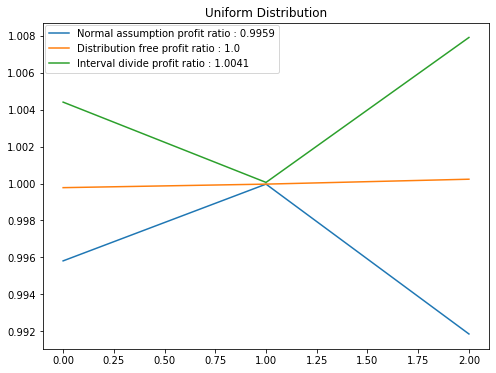

In [12]:
nana_p = pd.read_csv('temp/실험1/uniform/nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('temp/실험1/uniform/dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('temp/실험1/uniform/idid_p.csv', header = 0, index_col = 0, squeeze = True)

nana = pd.read_csv('temp/실험1/uniform/nana.csv', header = 0, index_col = 0, squeeze = True)
dfdf = pd.read_csv('temp/실험1/uniform/dfdf.csv', header = 0, index_col = 0, squeeze = True)
idid = pd.read_csv('temp/실험1/uniform/idid.csv', header = 0, index_col = 0, squeeze = True)

dfdf = pd.DataFrame(dfdf)
nana = pd.DataFrame(nana)
idid = pd.DataFrame(idid)
dfdf['beta'] = (dfdf.index) % 3 + 1
nana['beta'] = (nana.index) % 3 + 1
idid['beta'] = (idid.index) % 3 + 1

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf_p['beta'] = (dfdf_p.index) % 3 + 1
nana_p['beta'] = (nana_p.index) % 3 + 1
idid_p['beta'] = (idid_p.index) % 3 + 1

dfdf_p_l = list()
nana_p_l = list()
idid_p_l = list()

dfdf_std = list()
nana_std = list()
idid_std = list()

for i in range(1,4):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
    dfdf_std.append(dfdf[dfdf.beta == i].iloc[:,0].std())
#     print(np.std(dfdf_std))
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    nana_std.append(nana[nana.beta == i].iloc[:,0].std())
#     print(np.std(nana_std))
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())
    idid_std.append(idid[idid.beta == i].iloc[:,0].std())
#     print(np.std(idid_std))

plt.figure(figsize = (8, 6))
plt.title('Uniform Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
print('nana', nana_p.iloc[:,0].mean(),
      'dfdf', dfdf_p.iloc[:,0].mean(),
      'idid', idid_p.iloc[:,0].mean())
print(nana_p)
print(dfdf_p)
print(idid_p)

### normal

nana 1.000979952522795 0.0003008300035818476 dfdf 1.0006176639381408 0.0006614129104137563 idid 0.9984023835390646 0.0009553249624850169
[1.0008466907629303, 1.0013243956929043, 1.0007687711125504]
[1.0005150264160925, 1.0013243956929043, 1.0000135697054249]
[0.9986382828209772, 0.9973512086141914, 0.9992176591820252]


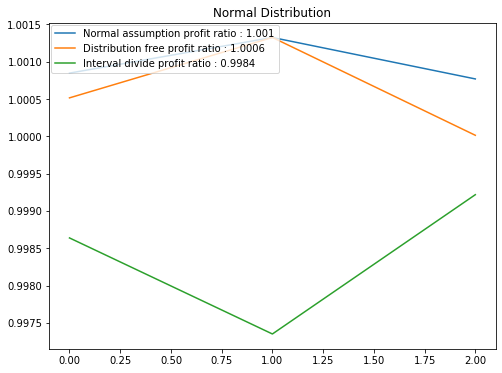

In [13]:
nana_p = pd.read_csv('temp/실험1/normal/nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('temp/실험1/normal/dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('temp/실험1/normal/idid_p.csv', header = 0, index_col = 0, squeeze = True)

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf_p['beta'] = (dfdf_p.index) % 3 + 1
nana_p['beta'] = (nana_p.index) % 3 + 1
idid_p['beta'] = (idid_p.index) % 3 + 1

dfdf_p_l = list()
nana_p_l = list()
idid_p_l = list()

for i in range(1, 4):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
#     print(dfdf_p[dfdf_p.beta == i])
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())

plt.figure(figsize = (8, 6))
plt.title('Normal Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
print('nana', nana_p.iloc[:,0].mean(),nana_p.iloc[:,0].std(),
      'dfdf', dfdf_p.iloc[:,0].mean(), dfdf_p.iloc[:,0].std(),
      'idid', idid_p.iloc[:,0].mean(), idid_p.iloc[:,0].std())
print( nana_p_l)
print(dfdf_p_l)
print(idid_p_l)

### multimodal

nana 0.9954953892549213 0.003117002259347408 dfdf 0.9980180237674728 0.001852835027568289 idid 1.006486586977606 0.004317182916734483
[0.9920025104993496, 0.9964897969951186, 0.9979938602702956]
[0.9974854529829366, 0.9964897969951186, 1.0000788213243634]
[1.010512036517714, 1.0070204060097627, 1.0019273184053414]


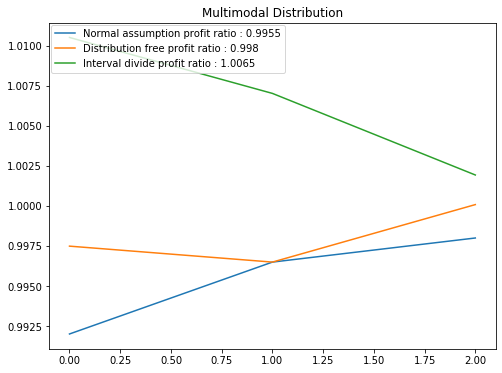

In [17]:
nana_p = pd.read_csv('temp/실험1/multimodal/nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('temp/실험1/multimodal/dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('temp/실험1/multimodal/idid_p.csv', header = 0, index_col = 0, squeeze = True)

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf_p['beta'] = (dfdf_p.index) % 3 + 1
nana_p['beta'] = (nana_p.index) % 3 + 1
idid_p['beta'] = (idid_p.index) % 3 + 1

dfdf_p_l = list()
nana_p_l = list()
idid_p_l = list()

for i in range(1,4):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
#     print(dfdf_p[dfdf_p.beta == i])
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())

plt.figure(figsize = (8, 6))
plt.title('Multimodal Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
print('nana', nana_p.iloc[:,0].mean(),nana_p.iloc[:,0].std(),
      'dfdf', dfdf_p.iloc[:,0].mean(), dfdf_p.iloc[:,0].std(),
      'idid', idid_p.iloc[:,0].mean(), idid_p.iloc[:,0].std())
print( nana_p_l)
print(dfdf_p_l)
print(idid_p_l)

### unknown

nana 0.9844722935145628 0.005759864498139248 dfdf 0.9854067059936971 0.0003401747417586211 idid 1.03012100049174 0.0057853490890388435
          0  beta
0  0.989940     1
1  0.985017     2
2  0.978459     3
          0  beta
0  0.985645     1
1  0.985017     2
2  0.985558     3
          0  beta
0  1.024415     1
1  1.029966     2
2  1.035982     3


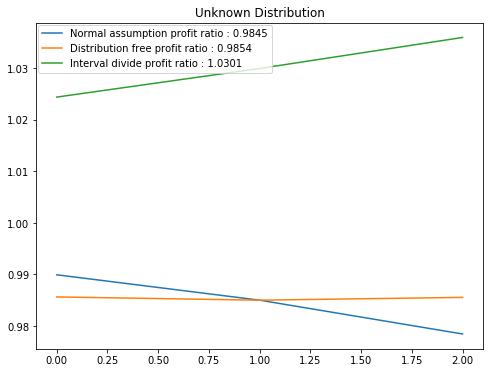

In [15]:
nana_p = pd.read_csv('temp/실험1/unknown/nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('temp/실험1/unknown/dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('temp/실험1/unknown/idid_p.csv', header = 0, index_col = 0, squeeze = True)

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf_p['beta'] = (dfdf_p.index) % 3 + 1
nana_p['beta'] = (nana_p.index) % 3 + 1
idid_p['beta'] = (idid_p.index) % 3 + 1

dfdf_p_l = list()
nana_p_l = list()
idid_p_l = list()

for i in range(1,4):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
#     print(dfdf_p[dfdf_p.beta == i])
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())

plt.figure(figsize = (8, 6))
plt.title('Unknown Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
print('nana', nana_p.iloc[:,0].mean(),nana_p.iloc[:,0].std(),
      'dfdf', dfdf_p.iloc[:,0].mean(), dfdf_p.iloc[:,0].std(),
      'idid', idid_p.iloc[:,0].mean(), idid_p.iloc[:,0].std())
print( nana_p)
print(dfdf_p)
print(idid_p)

In [3]:
nana_p = pd.read_csv('temp/실험2/unkown2/nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('temp/실험2/unkown2/dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('temp/실험2/unkown2/idid_p.csv', header = 0, index_col = 0, squeeze = True)

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf_p['beta'] = (dfdf_p.index) % 9 + 1
nana_p['beta'] = (nana_p.index) % 9 + 1
idid_p['beta'] = (idid_p.index) % 9 + 1

dfdf_p_l = list([1])
nana_p_l = list([1])
idid_p_l = list([1])

for i in range(1,10):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
#     print(dfdf_p[dfdf_p.beta == i])
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())

plt.figure(figsize = (8, 6))
plt.title('unknown Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
print('nana', nana_p.iloc[:,0].mean(),
      'dfdf', dfdf_p.iloc[:,0].mean(),
      'idid', idid_p.iloc[:,0].mean())


FileNotFoundError: [Errno 2] File temp/실험2/unkown2/nana_p.csv does not exist: 'temp/실험2/unkown2/nana_p.csv'

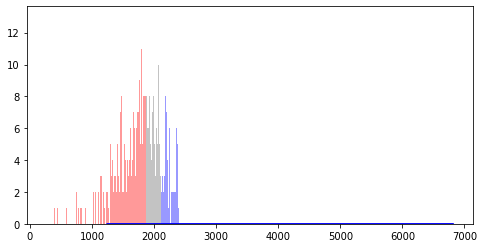

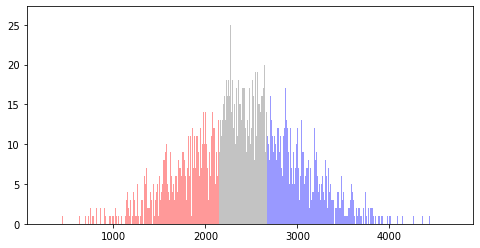

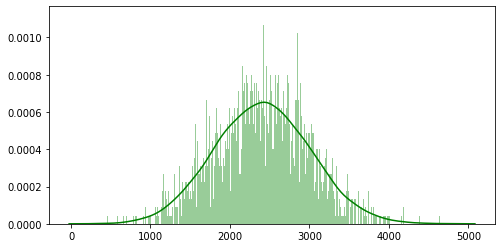

array([ 279.41204794,  396.75625767,  427.26142   , ..., 4636.44512007,
       4694.46904678, 4780.15704658])

In [5]:
no = np.random.normal(2400, 600, 10000)
nono = np.random.normal(4000, 600, 10000)
# comp = comp[comp['diff'] <= comp['diff'].quantile(q = q, interpolation = 'nearest')]      
no.sort()
nonop = pd.DataFrame(nono)
# no[6666]
no1 = no[0:3333]
no2 = no[3333:6666]
no3 = no[6666:9999]
cc = no[0:9999]
cc1 = cc[0:1866]
cc2 = cc[1866:3132]
cc3 = cc[3132:5000]

plt.figure(figsize=(8, 4))
sns.distplot(cc1, color="red", hist = True, kde = False, bins = 1000)
sns.distplot(cc2, color="dimgrey", hist = True, kde = False, bins = 227)
sns.distplot(cc3, color="blue", hist = True, kde = False, bins = 500)
sns.distplot(nonop, color="blue", hist = True, bins = 1000)
plt.show()

plt.figure(figsize=(8, 4))
# plt.hist(no1, bins = 1000, color = "royalblue", ec="royalblue")
# plt.hist(no2, bins = 227, color = "g", ec="g")
# plt.hist(no3, bins = 1000, color = "orange", ec="orange")
sns.distplot(no1, color="red", hist = True, kde = False, bins = 1000)
sns.distplot(no3, color="blue", hist = True,kde = False, bins = 1000)
sns.distplot(no2, color="dimgrey", hist = True, kde = False, bins = 227)
plt.show()

plt.figure(figsize = (8,4))
sns.distplot(no, color="green", hist = True, kde = True, bins = 2000)
plt.show()
no

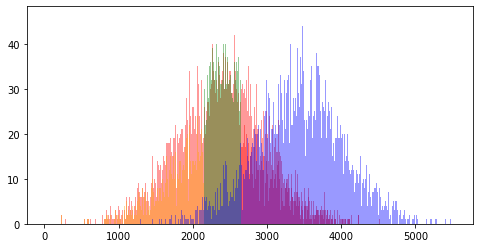

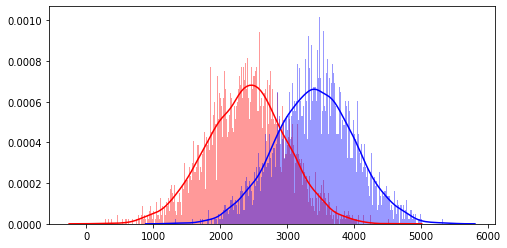

In [6]:
no = np.random.normal(2400, 600, 10000)
no.sort()
nop = pd.DataFrame(no)
nono = np.random.normal(3400, 600, 10000)
nono.sort()
nonop = pd.DataFrame(nono)

plt.figure(figsize = (8, 4))
sns.distplot(nop, color="red", hist = True, kde = False, bins = 1000)
sns.distplot(nop[:3333], color="orange", hist = True, kde = False, bins = 700)
sns.distplot(nop[3333:6666], color="green", hist = True, kde = False, bins = 100)
sns.distplot(nop[6666:9999], color="red", hist = True, kde = False, bins = 700)
sns.distplot(nonop, color="blue", hist = True, kde = False, bins = 1000)
plt.show()

plt.figure(figsize = (8, 4))
# plt.hist(no, bins = 1000, color = 'orange')
# plt.hist(nono, bins = 1000)
sns.distplot(nop, color="red", hist = True, bins = 1000)
sns.distplot(nonop, color="blue", hist = True, bins = 1000)
plt.show()

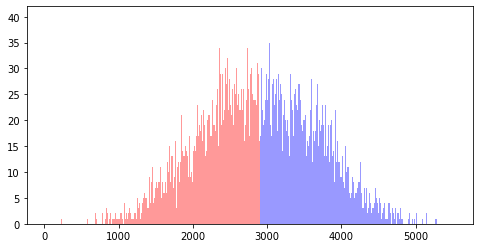

In [7]:
cc = pd.concat([nop, nonop], ignore_index = True)
cc = np.array(cc[0].tolist())
cc.sort()
ccp = pd.DataFrame(cc)
cc1 = np.array(cc[0].tolist())

plt.figure(figsize = (8, 4))
# plt.hist(cc1, bins = 2000, color = 'royalblue')
sns.distplot(ccp[10000:], color="blue",hist = True, kde = False,  bins = 1000)
sns.distplot(ccp[:10000], color="red", hist = True, kde = False,  bins = 1000)
plt.show()

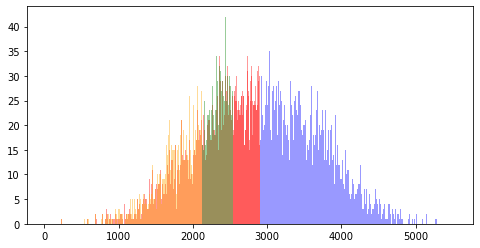

In [8]:
plt.figure(figsize = (8, 4))
sns.distplot(ccp[10000:], color="blue",hist = True, kde = False,  bins = 1000)
sns.distplot(ccp[:10000], color="red", hist = True, kde = False,  bins = 1000)
sns.distplot(ccp[:3333], color="orange", hist = True, kde = False, bins = 600)
sns.distplot(ccp[3333:6666], color="green", hist = True, kde = False, bins = 133)
sns.distplot(ccp[6666:9999], color="red", hist = True, kde = False, bins = 133)
# sns.distplot(cc, color="red", kde = False, bins = 1000)
plt.show()

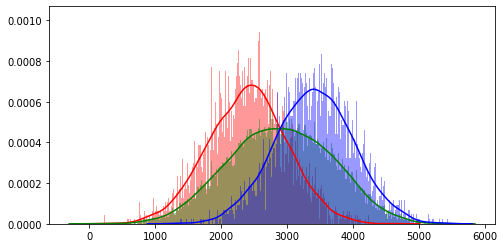

In [9]:
plt.figure(figsize = (8, 4))
# plt.hist(cc1, bins = 2000, color = 'royalblue')
sns.distplot(nop, color="red", hist = True, bins = 1000)
sns.distplot(cc, color="green", hist = True, bins = 300)
sns.distplot(nonop, color="blue", hist = True, bins = 1000)
plt.show()

In [ ]:
# nop, nonop, cc
print(np.mean(nop), np.std(nop))
print(np.mean(nonop), np.std(nonop))
print(np.mean(cc), np.std(cc))


### 실험 1 unknown

In [ ]:
nana_p = pd.read_csv('temp/실험1/unknown/nana_p.csv', header = 0, index_col = 0, squeeze = True)
dfdf_p = pd.read_csv('temp/실험1/unknown/dfdf_p.csv', header = 0, index_col = 0, squeeze = True)
idid_p = pd.read_csv('temp/실험1/unknown/idid_p.csv', header = 0, index_col = 0, squeeze = True)

dfdf_p = pd.DataFrame(dfdf_p)
nana_p = pd.DataFrame(nana_p)
idid_p = pd.DataFrame(idid_p)
dfdf_p['beta'] = (dfdf_p.index) % 3 + 1
nana_p['beta'] = (nana_p.index) % 3 + 1
idid_p['beta'] = (idid_p.index) % 3 + 1

dfdf_p_l = list()
nana_p_l = list()
idid_p_l = list()

for i in range(1,4):
    dfdf_p_l.append(dfdf_p[dfdf_p.beta == i].iloc[:,0].mean())
#     print(dfdf_p[dfdf_p.beta == i])
    nana_p_l.append(nana_p[nana_p.beta == i].iloc[:,0].mean())
    idid_p_l.append(idid_p[idid_p.beta == i].iloc[:,0].mean())

plt.figure(figsize = (8, 6))
plt.title('Unknown Distribution')
plt.plot(nana_p_l, label = 'Normal assumption profit ratio : 'f'{round(np.mean(nana_p_l), 4)}')
plt.plot(dfdf_p_l, label = 'Distribution free profit ratio : 'f'{round(np.mean(dfdf_p_l), 4)}')
plt.plot(idid_p_l, label = 'Interval divide profit ratio : 'f'{round(np.mean(idid_p_l), 4)}')
plt.legend(loc='upper left', borderaxespad=0.2)
print('nana', nana_p.iloc[:,0].mean(),
      'dfdf', dfdf_p.iloc[:,0].mean(),
      'idid', idid_p.iloc[:,0].mean())
